In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import numpy as np
%matplotlib inline

In [2]:
week = ['Sunday',
        'Monday',
        'Tuesday',
        'Wednesday',
        'Thursday',
        'Friday',
        'Saturday']

dataset = 'event_parse/event_parse/new_events.csv'
df = pd.read_csv(dataset)

In [3]:
dates = df['event_date'].tolist()
start = []
stop = []

for date in dates:
    tmp = [int(x) for x in date.split('-')]
    start.append(datetime.datetime(*tmp[:3]))
    if len(tmp) == 6:
        stop.append(datetime.datetime(*tmp[3:]))
    else:
        stop.append(datetime.datetime(*tmp[:3]) + datetime.timedelta(days=1))

df['start'] = start
df['stop'] = stop

In [19]:
df['start'] = start
df['stop'] = stop
df['duration'] = ((df['stop'] - df['start']) /
                  np.timedelta64(1, 'D')).astype(int)
df['start_day'] = df['start'].apply(
    lambda x: week[x.weekday()])
df['stop_day'] = df['stop'].apply(lambda x: week[x.weekday()])
df['weekend'] = df['start_day'].isin(['Saturday', 'Sunday'])
df = df[df['duration'] != 0]

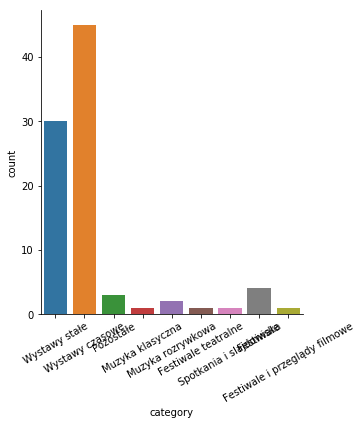

In [20]:
g = sns.catplot(x="category", kind="count", data=df[df['duration'] > 2])
g.set_xticklabels(rotation=30)

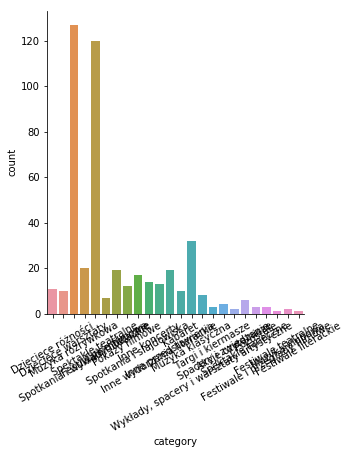

In [21]:
g = sns.catplot(x="category", kind="count", data=df[df['duration']  == 1])
g.set_xticklabels(rotation=30)

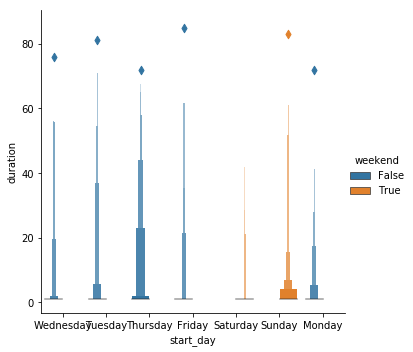

In [24]:
sns.catplot(x="start_day", y="duration", hue='weekend', kind="boxen",
            data=df[df['duration'] < df['duration'].quantile(0.9)].sort_values("duration"));
